In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

%matplotlib inline

In [63]:
!iconv -f cp1251 -t utf-8 vk_feed.csv -o vk_feed_utf.csv 

In [64]:
data = pd.read_csv('cleaned_data.csv', index_col=0)
data.head()

,text,status,predict_proba,predict,lang
0,ребят краснодар нужны доноры положительная для...,1,1,True,ru
1,волгоград прошу максимальный перепост предыдущ...,1,1,True,ru
2,срочно требуются доноры крови любая цельная кр...,1,1,True,ru
4,анонимно люди крик о помощи срочно а точнее в ...,1,1,True,ru
5,люди крик о помощи срочно а точнее в понедельн...,1,1,True,ru


In [65]:
from langdetect import detect

def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return '-'

In [66]:
#data['lang']= data['text'].apply(lambda x: detect_language(x))
#data.head()

In [67]:
data.groupby(by='lang').count()

,text,status,predict_proba,predict
lang,,,,
ru,26108,26108,26108,26108


In [68]:
data = data[data['lang'] == 'ru']

In [69]:
data.groupby(by='status').count()

,text,predict_proba,predict,lang
status,,,,
0,1811,1811,1811,1811
1,24297,24297,24297,24297


In [70]:
import re
from html2text import html2text

def preprocess(text):
    text = html2text(text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('[A-Za-z0-9]', '', text) #removing english
    text = text.lower()
    return text

In [133]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])

print(X.shape)

(26108, 41068)


In [134]:
y = data['status']

In [135]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [136]:
model.score(X, y)

0.99256932740922321

In [137]:
predict_proba = list(map(lambda x: x[1], model.predict_proba(X)))
data['predict_proba'] = predict_proba

In [138]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_true = data['status']
fpr, tpr, thresholds = roc_curve(y_true, predict_proba)
auc_score = auc(fpr, tpr)

In [139]:
def plot_roc(fpr, tpr, auc_score):
    plt.figure()
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 0.5])
    plt.ylim([0.5, 1.0])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC Curve. AUC = {0:.2f}'.format(auc_score))
    plt.show()

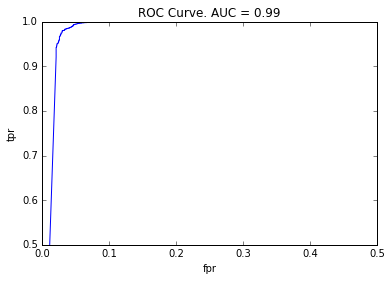

In [140]:
plot_roc(fpr, tpr, auc_score)

In [141]:
from sklearn.metrics import precision_recall_curve

precision, recall, pcrt = precision_recall_curve(y_true, predict_proba)
pcrt = np.insert(pcrt, 0, 0)

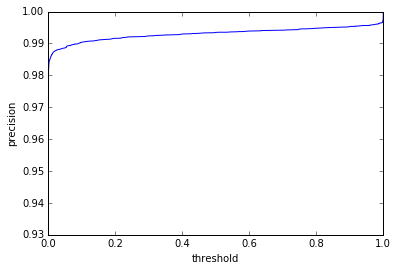

In [142]:
plt.figure()
plt.plot(pcrt, precision)
plt.xlabel('threshold')
plt.ylabel('precision')

(0.9, 1.0)

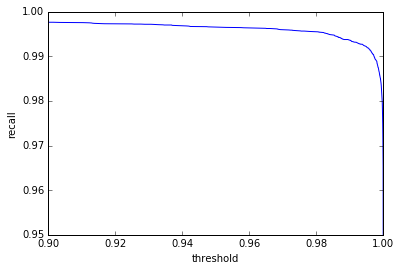

In [143]:
plt.figure()
plt.plot(pcrt, recall)
plt.xlabel('threshold')
plt.ylabel('recall')
plt.ylim([0.95, 1.0])
plt.xlim([0.90, 1.0])

In [170]:
positive_prior = model.class_count_[1] / sum(model.class_count_)
print(positive_prior)

0.930634288341


In [163]:
data['predict'] = data['predict_proba'] > positive_prior
data.to_csv('cleaned_data.csv')

In [164]:
false_negative = data[~data['predict'] & (data['status'] == 1)]
false_negative

,text,status,predict_proba,predict,lang
300,срочно нужен донор у щенульки энтерит полное о...,1,6.183612e-02,False,ru
2733,были сегодня в биоконтроле тимошу тошнило бабу...,1,6.021929e-07,False,ru
4664,молодежь камешково в рамках подготовки к молод...,1,5.878324e-01,False,ru
4978,нужен кот донор крови срочно очень прошу совет...,1,1.063452e-02,False,ru
5077,москва мо для противовирусной терапии котятам ...,1,1.361906e-01,False,ru
5426,алена ли срочно нужна помощь щенкам эльзы один...,1,5.755671e-04,False,ru
5630,москва регионы кошачий приют ночной охотник _ ...,1,2.688823e-01,False,ru
5943,моя новая рука до того момента пока выпрямится...,1,6.506173e-05,False,ru
6239,мне нужно переливание крови или я умру,1,7.894197e-01,False,ru
6417,спб московский район ищем хозяев и донора найд...,1,9.167301e-01,False,ru


In [165]:
false_positive = data[data['predict'] & (data['status'] == 0)]
false_positive

,text,status,predict_proba,predict,lang
14394,нужна помощь нухотьчтотохорошее,0,0.965719,True,ru
32358,москва помогите спасти жизни срочно нужны доно...,0,1.000000,True,ru
32422,ирина ивасюк нужна срочно собака привитая доно...,0,1.000000,True,ru
32432,анастасия кудрина друзья кому не тяжело и имее...,0,0.980965,True,ru
32445,извините ребят но у нас осложнение филатову ср...,0,1.000000,True,ru
32475,срочно требуется донор почки группа крови опла...,0,0.999991,True,ru
32501,срочно очень просим неравнодушных людей помочь...,0,1.000000,True,ru
32512,вовчик привет нам нужна помощь мой брат в боль...,0,1.000000,True,ru
32513,друзья поможем вместе нам срочно нужна помощь ...,0,0.997522,True,ru
32533,может кому нибудь нужен котофей,0,0.958305,True,ru


In [148]:
from sklearn.externals import joblib

joblib.dump(vectorizer, 'model/vectorizer.pkl')
joblib.dump(model, 'model/model.pkl')

['model/model.pkl',
 'model/model.pkl_01.npy',
 'model/model.pkl_02.npy',
 'model/model.pkl_03.npy',
 'model/model.pkl_04.npy',
 'model/model.pkl_05.npy']